In [297]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import ccf

In [298]:
palette_tab10 = sns.color_palette("tab10", 10)
cmap = sns.color_palette([palette_tab10[0], palette_tab10[1]], as_cmap=True)
cmap

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725)]

Read the data

In [299]:
DIR_SUBJECT_1 = '../udataset/meat/production.csv'
# DIR_SUBJECT_1 = '../udataset/meat/cold_storage.csv'
# DIR_SUBJECT_1 = '../udataset/meat/slaughter.csv'
# DIR_SUBJECT_1 = '../udataset/meat/weights.csv'
df_subject1 = pd.read_csv(DIR_SUBJECT_1)
df_subject1

,DateTime,Beef,Veal,Pork,Lamb and Mutton,Broiler,Other Chicken,Turkey,Frozen Egg,Red Meat,Poultry
0,1983-01,294380000.0,7360000.0,219020000.0,8650000.0,NaN,18000000.0,203910000.0,NaN,529410000.0,2.219100e+08
1,1983-02,303210000.0,7260000.0,224150000.0,7680000.0,NaN,19870000.0,193830000.0,NaN,542300000.0,2.137000e+08
2,1983-03,307050000.0,7570000.0,215820000.0,7670000.0,NaN,17280000.0,187690000.0,NaN,538110000.0,2.049700e+08
3,1983-04,299080000.0,6770000.0,234740000.0,8220000.0,NaN,18790000.0,185330000.0,NaN,548810000.0,2.041200e+08
4,1983-05,277330000.0,7250000.0,272720000.0,8330000.0,NaN,23180000.0,192270000.0,NaN,565630000.0,2.154500e+08
...,...,...,...,...,...,...,...,...,...,...,...
487,2023-08,410460000.0,1170000.0,470760000.0,27400000.0,810060000.0,8280000.0,439790000.0,29400000.0,909790000.0,1.287530e+09
488,2023-09,395400000.0,1150000.0,469240000.0,26170000.0,793450000.0,9250000.0,446880000.0,32210000.0,891960000.0,1.281790e+09
489,2023-10,420850000.0,1300000.0,461660000.0,26160000.0,795130000.0,8590000.0,421230000.0,30180000.0,909970000.0,1.255130e+09
490,2023-11,445670000.0,940000.0,437900000.0,26130000.0,822630000.0,7030000.0,319650000.0,31460000.0,910640000.0,1.180770e+09


In [300]:
# DIR_SUBJECT_2 = '../udataset/unemployment_month_US.csv'
DIR_SUBJECT_2 = '../dataset/youth_unemployment_rate.csv'
# DIR_SUBJECT_2 = '../dataset/national_hourly_earnings.csv'
df_subject2 = pd.read_csv(DIR_SUBJECT_2)
df_subject2

,YearMonth,UnemploymentRate
0,1948-01-01,6.8
1,1948-02-01,7.7
2,1948-03-01,8.7
3,1948-04-01,7.8
4,1948-05-01,6.7
...,...,...
910,2023-11-01,8.0
911,2023-12-01,8.0
912,2024-01-01,7.3
913,2024-02-01,8.8


Make variables for specific dataset 1

In [301]:
# For meat production
df_subject1 = df_subject1.drop(columns=['Other Chicken'])
df_subject1 = df_subject1.dropna()
MEAT_TYPE = ['beef', 'veal', 'pork', 'lamb_and_mutton', 'broiler', 'turkey', 'frozen_egg', 'red_meat', 'poultry']
SUBJECT1 = 'meat_production'
UNIT = 'Pounds'

# For meat cold storage
SUBJECT_TITLE1 = SUBJECT1.replace('_', ' ').title()
df_subject1

,DateTime,Beef,Veal,Pork,Lamb and Mutton,Broiler,Turkey,Frozen Egg,Red Meat,Poultry
245,2003-06,385120000.0,5100000.0,499720000.0,5840000.0,672030000.0,658840000.0,17700000.0,895780000.0,1.353550e+09
246,2003-07,371480000.0,4070000.0,460010000.0,5430000.0,639610000.0,718210000.0,17950000.0,840990000.0,1.379280e+09
247,2003-08,368250000.0,3800000.0,440650000.0,5930000.0,621270000.0,722540000.0,18570000.0,818630000.0,1.366120e+09
248,2003-09,370990000.0,4170000.0,430240000.0,5860000.0,601010000.0,706500000.0,18040000.0,811260000.0,1.331280e+09
249,2003-10,379830000.0,4600000.0,435150000.0,6210000.0,590660000.0,647540000.0,16640000.0,825790000.0,1.260040e+09
...,...,...,...,...,...,...,...,...,...,...
487,2023-08,410460000.0,1170000.0,470760000.0,27400000.0,810060000.0,439790000.0,29400000.0,909790000.0,1.287530e+09
488,2023-09,395400000.0,1150000.0,469240000.0,26170000.0,793450000.0,446880000.0,32210000.0,891960000.0,1.281790e+09
489,2023-10,420850000.0,1300000.0,461660000.0,26160000.0,795130000.0,421230000.0,30180000.0,909970000.0,1.255130e+09
490,2023-11,445670000.0,940000.0,437900000.0,26130000.0,822630000.0,319650000.0,31460000.0,910640000.0,1.180770e+09


Make variables for specific dataset 2

In [302]:
# # For unemployment_month_US.csv
# df_subject2 = df_subject2.rename(columns={'Year-Month': 'datetime'})
# SUBJECT2 = 'unemployment_rate'

# For youth_unemployment_rate.csv
df_subject2 = df_subject2.rename(columns={'YearMonth': 'datetime', 'UnemploymentRate': 'unemployment_rate'})
SUBJECT2 = 'unemployment_rate'

# # For national_hourly_earnings.csv
# df_subject2 = df_subject2.rename(columns={'YearMonth': 'datetime', 'HourlyEarnings': 'hourly_earnings'})
# SUBJECT2 = 'hourly_earnings'

SUBJECT_TITLE2 = SUBJECT2.replace('_', ' ').title()
df_subject2

,datetime,unemployment_rate
0,1948-01-01,6.8
1,1948-02-01,7.7
2,1948-03-01,8.7
3,1948-04-01,7.8
4,1948-05-01,6.7
...,...,...
910,2023-11-01,8.0
911,2023-12-01,8.0
912,2024-01-01,7.3
913,2024-02-01,8.8


Change label format to be lower + underscores instead of space

In [303]:
df_subject1.columns = df_subject1.columns.str.lower().str.replace(' ', '_')
df_subject2.columns = df_subject2.columns.str.lower().str.replace(' ', '_')

Change date format to better use together

In [304]:
df_subject1['datetime'] = pd.to_datetime(df_subject1['datetime'])
df_subject2['datetime'] = pd.to_datetime(df_subject2['datetime'])
df_subject2

,datetime,unemployment_rate
0,1948-01-01,6.8
1,1948-02-01,7.7
2,1948-03-01,8.7
3,1948-04-01,7.8
4,1948-05-01,6.7
...,...,...
910,2023-11-01,8.0
911,2023-12-01,8.0
912,2024-01-01,7.3
913,2024-02-01,8.8


In [305]:
df_subject1 = df_subject1.iloc[::-1]
df_subject1.reset_index(drop=True, inplace=True)
df_subject1

,datetime,beef,veal,pork,lamb_and_mutton,broiler,turkey,frozen_egg,red_meat,poultry
0,2023-12-01,457410000.0,890000.0,415660000.0,22430000.0,847100000.0,203100000.0,29360000.0,896390000.0,1.085820e+09
1,2023-11-01,445670000.0,940000.0,437900000.0,26130000.0,822630000.0,319650000.0,31460000.0,910640000.0,1.180770e+09
2,2023-10-01,420850000.0,1300000.0,461660000.0,26160000.0,795130000.0,421230000.0,30180000.0,909970000.0,1.255130e+09
3,2023-09-01,395400000.0,1150000.0,469240000.0,26170000.0,793450000.0,446880000.0,32210000.0,891960000.0,1.281790e+09
4,2023-08-01,410460000.0,1170000.0,470760000.0,27400000.0,810060000.0,439790000.0,29400000.0,909790000.0,1.287530e+09
...,...,...,...,...,...,...,...,...,...,...
242,2003-10-01,379830000.0,4600000.0,435150000.0,6210000.0,590660000.0,647540000.0,16640000.0,825790000.0,1.260040e+09
243,2003-09-01,370990000.0,4170000.0,430240000.0,5860000.0,601010000.0,706500000.0,18040000.0,811260000.0,1.331280e+09
244,2003-08-01,368250000.0,3800000.0,440650000.0,5930000.0,621270000.0,722540000.0,18570000.0,818630000.0,1.366120e+09
245,2003-07-01,371480000.0,4070000.0,460010000.0,5430000.0,639610000.0,718210000.0,17950000.0,840990000.0,1.379280e+09


Plot meat data

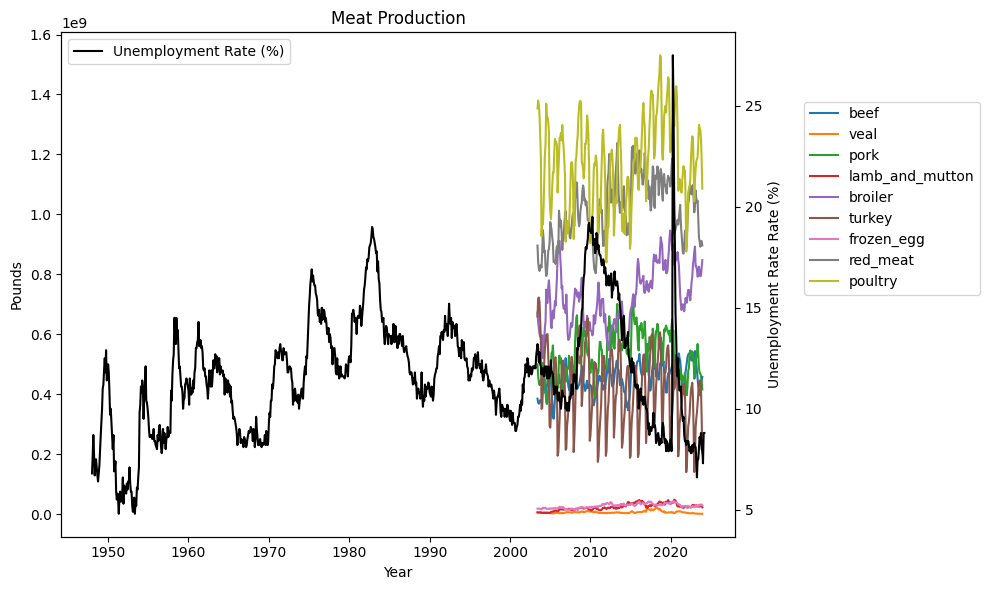

In [306]:
df_temp = pd.melt(df_subject1, id_vars='datetime', var_name='meat', value_name='amount')
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=df_temp, x='datetime', y='amount', hue='meat')
ax.set_title(SUBJECT_TITLE1)
ax.set_xlabel('Year')
ax.set_ylabel(UNIT)
ax.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)
ax2 = ax.twinx()
sns.lineplot(data=df_subject2, x='datetime', y=SUBJECT2, color='black', label=f'{SUBJECT_TITLE2} (%)', ax=ax2)
ax2.set_ylabel(f'{SUBJECT_TITLE2} Rate (%)')

plt.tight_layout()
plt.show()

Plot subject data

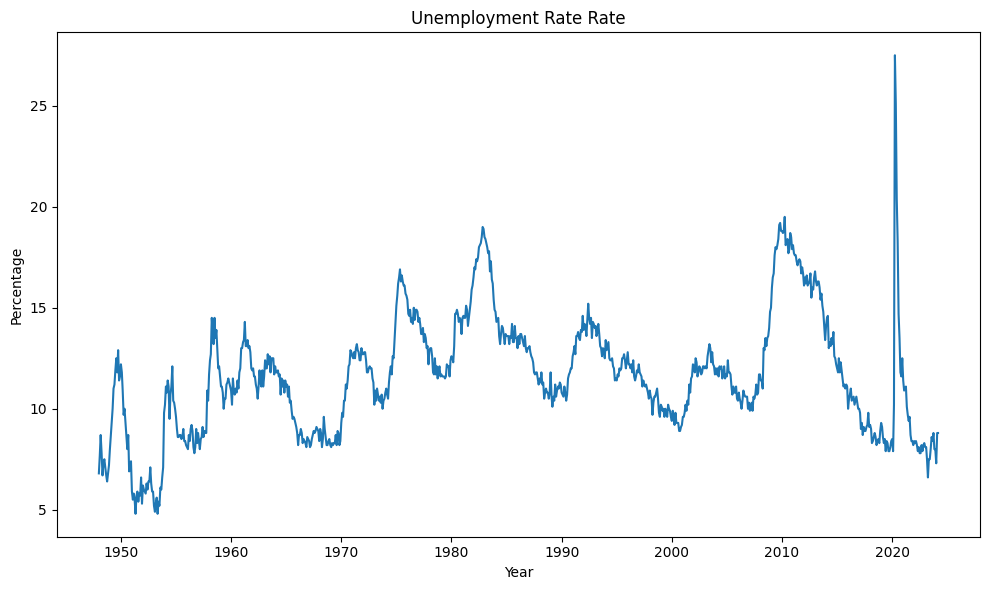

In [307]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=df_subject2, x='datetime', y=SUBJECT2)
ax.set_title(f'{SUBJECT_TITLE2} Rate')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
plt.tight_layout()
plt.show()

Calculate and plot rolling mean and std for meat

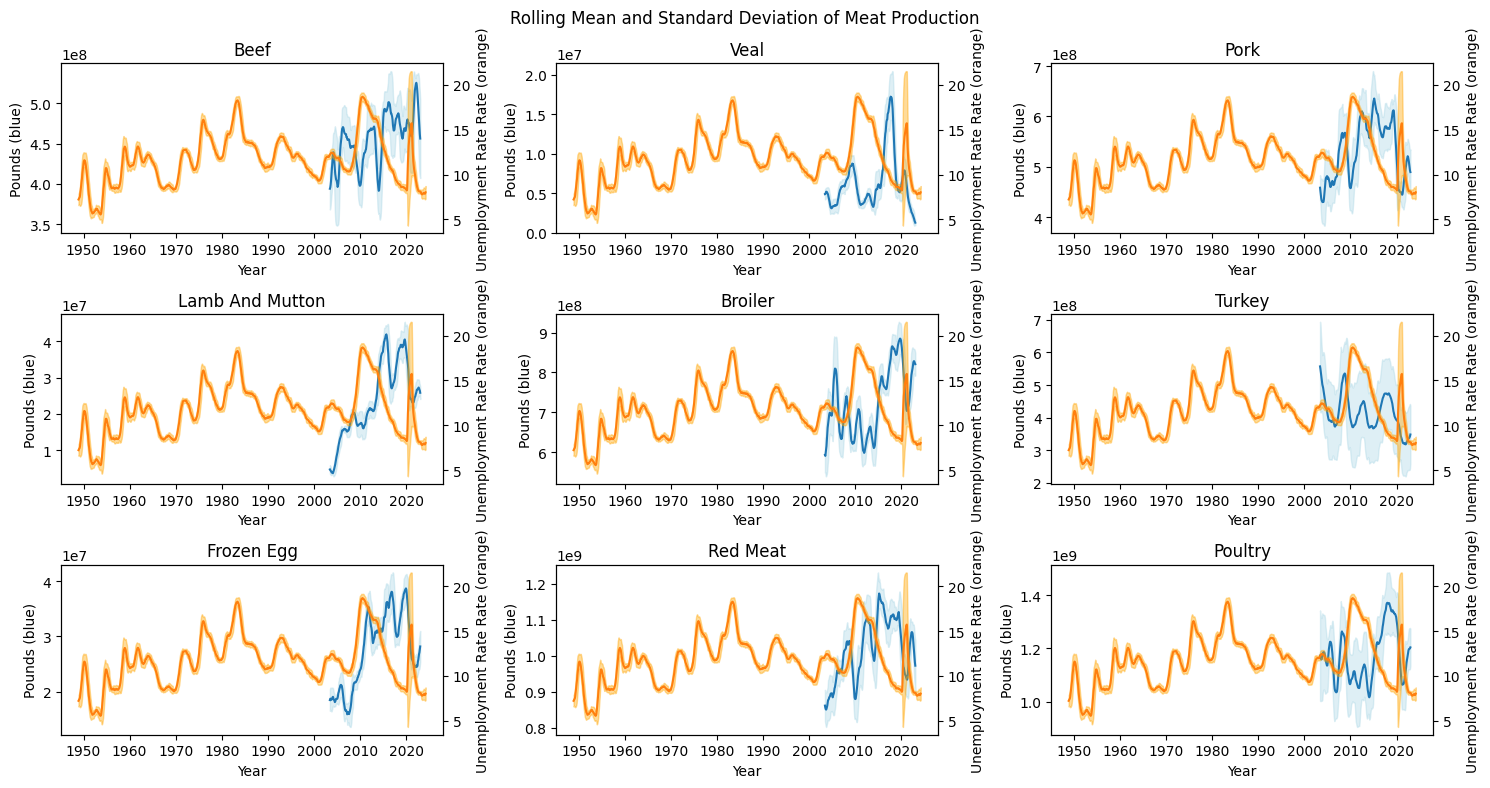

In [308]:
df_temp = df_subject1.copy()
for meat in MEAT_TYPE:
    df_temp[f'rolling_mean_{meat}'] = df_temp[meat].rolling(window=12).mean()
    df_temp[f'rolling_std_{meat}'] = df_temp[meat].rolling(window=12).std()
df_temp = df_temp.dropna()

df_temp2 = df_subject2.copy()
df_temp2['rolling_mean'] = df_temp2[SUBJECT2].rolling(window=12).mean()
df_temp2['rolling_std'] = df_temp2[SUBJECT2].rolling(window=12).std()
df_temp2 = df_temp2.dropna()

plt.figure(figsize=(15, 8))
plt.suptitle('Rolling Mean and Standard Deviation of Meat Production')
for i, meat in enumerate(MEAT_TYPE):
    mean_meat = df_temp[f'rolling_mean_{meat}']
    std_meat = df_temp[f'rolling_std_{meat}']
    ax = plt.subplot(3, 3, i+1)
    sns.lineplot(data=df_temp, x='datetime', y=f'rolling_mean_{meat}', color=cmap[0], label='', ax=ax)
    ax.fill_between(df_temp['datetime'], mean_meat-std_meat, mean_meat+std_meat, color='lightblue', alpha=0.4)
    title = meat.replace('_', ' ').title()
    ax.set_title(title)
    ax.set_ylabel(f'{UNIT} (blue)')
    ax.set_xlabel('Year')

    mean_subject = df_temp2['rolling_mean']
    std_subject = df_temp2['rolling_std']
    ax2 = ax.twinx()
    sns.lineplot(data=df_temp2, x='datetime', y='rolling_mean', color=cmap[1], ax=ax2)
    ax2.fill_between(df_temp2['datetime'], mean_subject-std_subject, mean_subject+std_subject, color='orange', alpha=0.4)
    ax2.set_ylabel(f'{SUBJECT_TITLE2} Rate (orange)')

plt.tight_layout()
plt.show()

Check for stationarity

In [309]:
def test_stationarity(timeseries, title):
    title = title.replace('_', ' ').title()

    result = adfuller(timeseries, autolag='AIC')
    adf_stat = result[0]
    p_val = result[1]
    used_lag = result[2]
    n_obs = result[3]
    critical_val = result[4]
    icbest = result[5]

    # Print the results in a more structured report format
    print(f"Augmented Dickey-Fuller Test Results for {title}:")
    print("-------------------------------------")
    print(f"Test Statistic: {adf_stat:.4f}")
    print(f"P-value: {p_val:.4f}")
    print(f"Number of Lags Used: {used_lag}")
    print(f"Number of Observations Used: {n_obs}")
    print("Critical Values:")
    for key, value in critical_val.items():
        print(f"    {key} ({value:.4f})")
    print(f"Information Criterion (best): {icbest:.4f}")

    # Provide a basic conclusion
    print("Conclusion:")
    if p_val < 0.05:
        print("The time series is stationary with 95% confidence.")
        return 1
    else:
        print("The time series is not stationary. Consider differencing or detrending.")
        return 0

for meat in MEAT_TYPE:
    test_stationarity(df_subject1[meat], meat)
    print('\n')

Augmented Dickey-Fuller Test Results for Beef:
-------------------------------------
Test Statistic: -2.6958
P-value: 0.0748
Number of Lags Used: 14
Number of Observations Used: 232
Critical Values:
    1% (-3.4589)
    5% (-2.8741)
    10% (-2.5735)
Information Criterion (best): 8307.8913
Conclusion:
The time series is not stationary. Consider differencing or detrending.


Augmented Dickey-Fuller Test Results for Veal:
-------------------------------------
Test Statistic: -2.8176
P-value: 0.0558
Number of Lags Used: 12
Number of Observations Used: 234
Critical Values:
    1% (-3.4586)
    5% (-2.8740)
    10% (-2.5734)
Information Criterion (best): 7128.5943
Conclusion:
The time series is not stationary. Consider differencing or detrending.


Augmented Dickey-Fuller Test Results for Pork:
-------------------------------------
Test Statistic: -2.8820
P-value: 0.0475
Number of Lags Used: 12
Number of Observations Used: 234
Critical Values:
    1% (-3.4586)
    5% (-2.8740)
    10% (-2.5

Decompose data into trend and seasonal

Augmented Dickey-Fuller Test Results for Beef:
-------------------------------------
Test Statistic: -6.1923
P-value: 0.0000
Number of Lags Used: 15
Number of Observations Used: 219
Critical Values:
    1% (-3.4606)
    5% (-2.8748)
    10% (-2.5739)
Information Criterion (best): 7798.3002
Conclusion:
The time series is stationary with 95% confidence.


Augmented Dickey-Fuller Test Results for Veal:
-------------------------------------
Test Statistic: -7.9226
P-value: 0.0000
Number of Lags Used: 8
Number of Observations Used: 226
Critical Values:
    1% (-3.4596)
    5% (-2.8744)
    10% (-2.5736)
Information Criterion (best): 6684.9241
Conclusion:
The time series is stationary with 95% confidence.


Augmented Dickey-Fuller Test Results for Pork:
-------------------------------------
Test Statistic: -7.8162
P-value: 0.0000
Number of Lags Used: 8
Number of Observations Used: 226
Critical Values:
    1% (-3.4596)
    5% (-2.8744)
    10% (-2.5736)
Information Criterion (best): 7971.1658

,datetime,residual_beef,residual_veal,residual_pork,residual_lamb_and_mutton,residual_broiler,residual_turkey,residual_frozen_egg,residual_red_meat,residual_poultry
6,2023-06-01,-6.933635e+06,149112.207602,2.003611e+07,-1.523770e+06,-2.982765e+06,-1.646567e+06,3.223867e+06,1.172782e+07,-9.935577e+05
7,2023-05-01,-1.998427e+06,106653.874269,2.006298e+07,-1.980582e+06,-1.850972e+07,9.308100e+06,-1.813008e+06,1.619063e+07,-1.075487e+07
8,2023-04-01,6.725823e+06,-141429.459064,-1.233703e+06,2.261052e+05,9.270880e+06,2.086106e+07,-1.916071e+06,5.576797e+06,2.888807e+07
9,2023-03-01,9.417011e+06,-810096.125731,-3.013768e+07,3.458314e+06,9.037985e+06,3.355216e+07,-2.247550e+06,-1.807245e+07,4.079632e+07
10,2023-02-01,1.566472e+07,-805241.959064,-1.117333e+07,-4.737282e+05,-2.509578e+06,5.025110e+07,1.583617e+06,3.212422e+06,4.992215e+07
...,...,...,...,...,...,...,...,...,...,...
236,2004-04-01,4.052490e+06,567320.540936,-1.905495e+07,5.873552e+05,-1.906329e+07,9.310225e+06,1.370179e+06,-1.384779e+07,-6.779433e+06
237,2004-03-01,1.770409e+07,-614679.459064,-2.605599e+06,2.828968e+05,-7.843327e+07,-6.607546e+05,1.394533e+06,1.476671e+07,-7.724285e+07
238,2004-02-01,4.754303e+06,-504825.292398,4.632584e+07,8.746052e+05,-8.574124e+07,-1.754432e+07,1.547783e+06,5.144992e+07,-1.013287e+08
239,2004-01-01,-2.636268e+07,-331450.292398,6.720161e+07,1.244209e+06,-2.887391e+07,-2.476894e+07,-5.320291e+05,4.175169e+07,-5.421554e+07


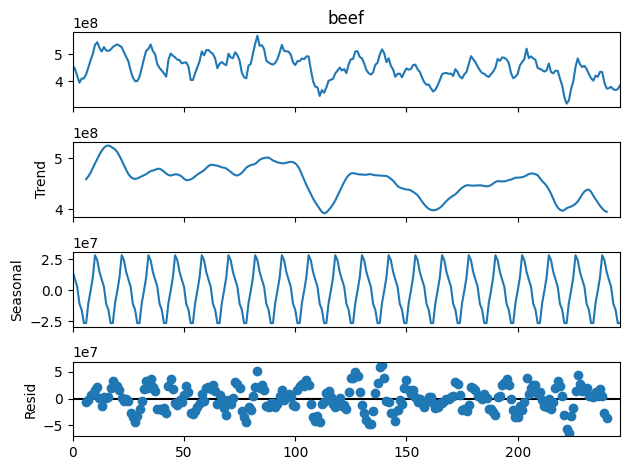

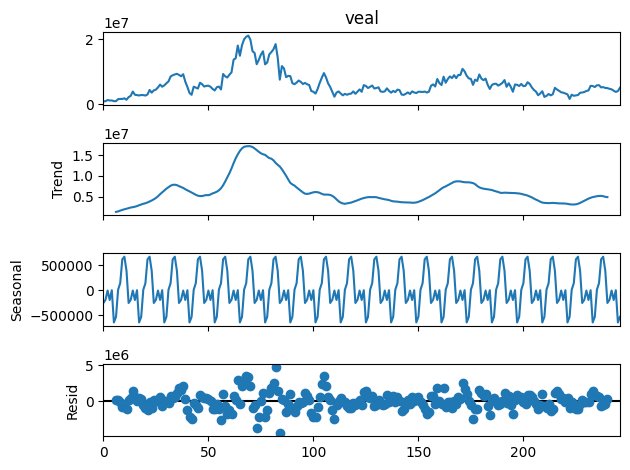

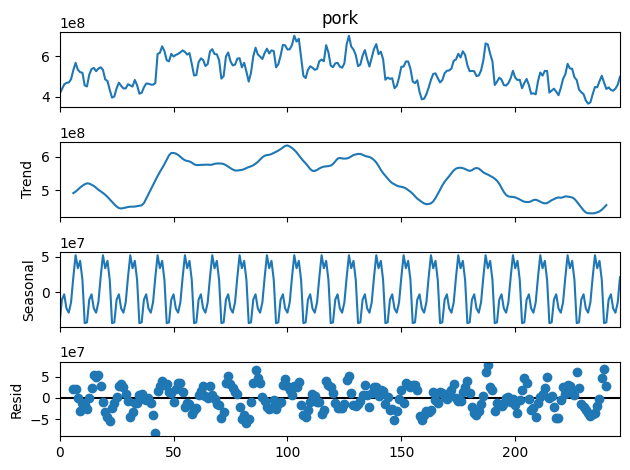

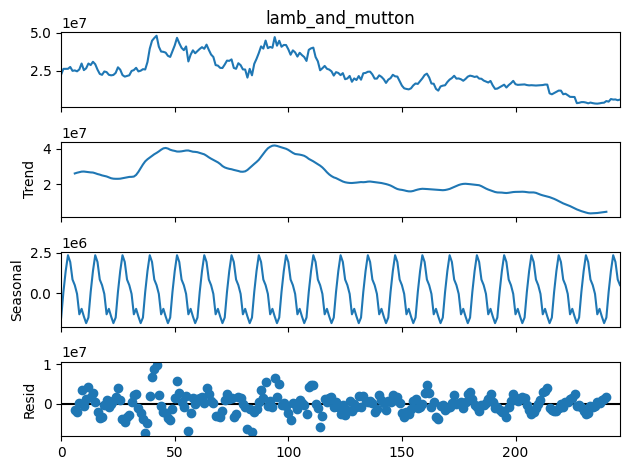

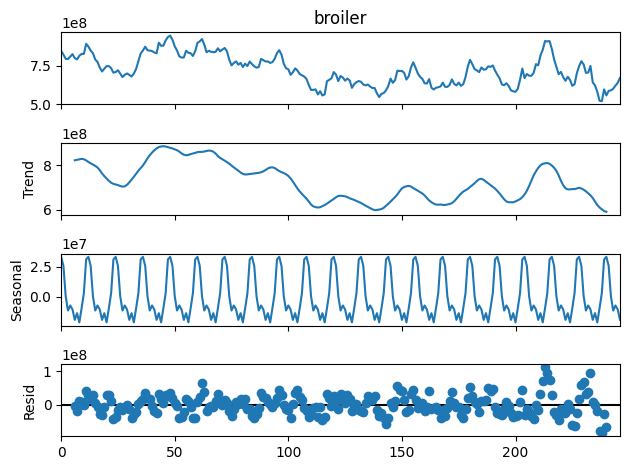

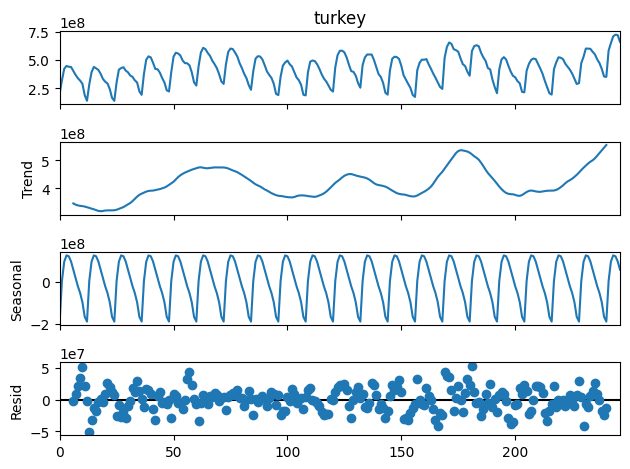

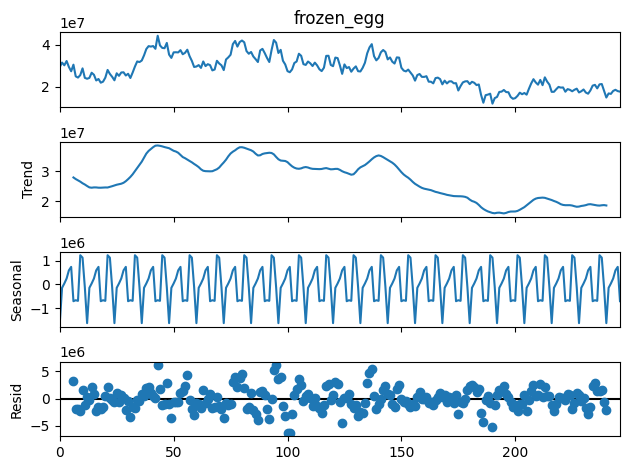

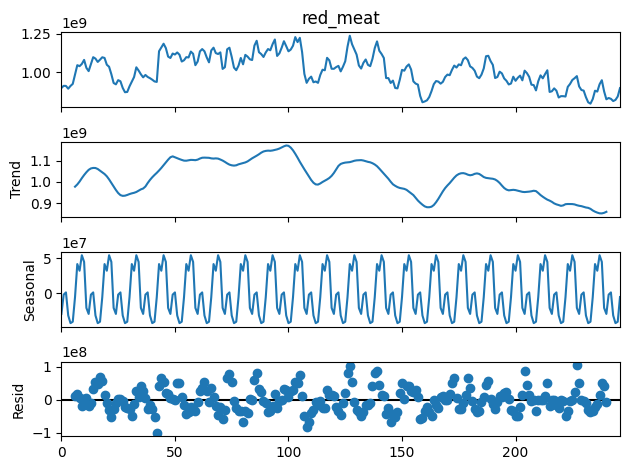

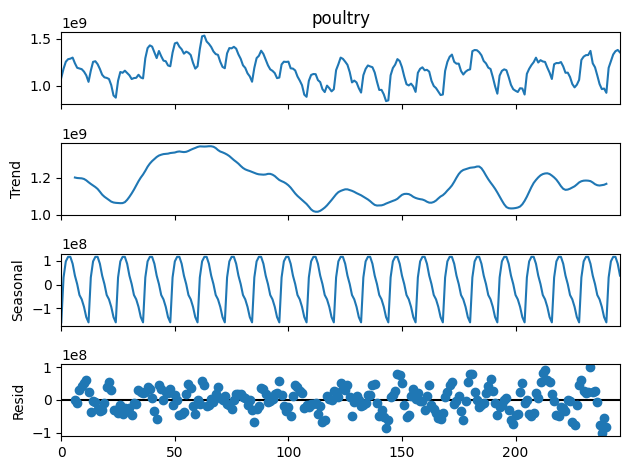

In [310]:
df_subject1_resid = df_subject1.copy()
for meat in MEAT_TYPE:
    decomposition = seasonal_decompose(df_subject1[meat], model='additive', period=12)
    residual = decomposition.resid
    decomposition.plot()
    df_subject1_resid[f'residual_{meat}'] = residual

df_subject1_resid = df_subject1_resid.dropna()
stationary = 0
for meat in MEAT_TYPE:
    if test_stationarity(df_subject1_resid[f'residual_{meat}'], meat):
        stationary += 1
    else:
        print(f'Residual for {meat} is not stationary. Consider differencing or detrending.')
    print('\n')

print(f'Number of stationary residuals: {stationary}/{len(MEAT_TYPE)}')
df_subject1_resid = df_subject1_resid.drop(columns=MEAT_TYPE)
df_subject1_resid

Check if unemployment rates is stationary

In [311]:
test_stationarity(df_subject2[SUBJECT2], SUBJECT2)

Augmented Dickey-Fuller Test Results for Unemployment Rate:
-------------------------------------
Test Statistic: -4.2832
P-value: 0.0005
Number of Lags Used: 0
Number of Observations Used: 914
Critical Values:
    1% (-3.4375)
    5% (-2.8647)
    10% (-2.5685)
Information Criterion (best): 2128.3962
Conclusion:
The time series is stationary with 95% confidence.


1

Get residual from seasonal trend decomposition

Augmented Dickey-Fuller Test Results for Unemployment Rate:
-------------------------------------
Test Statistic: -11.1457
P-value: 0.0000
Number of Lags Used: 16
Number of Observations Used: 886
Critical Values:
    1% (-3.4378)
    5% (-2.8648)
    10% (-2.5685)
Information Criterion (best): 1698.1821
Conclusion:
The time series is stationary with 95% confidence.


,datetime,residual_unemployment_rate
6,1948-07-01,0.159920
7,1948-08-01,-0.265080
8,1948-09-01,-0.738984
9,1948-10-01,-1.051324
10,1948-11-01,-0.930379
...,...,...
904,2023-05-01,-0.583768
905,2023-06-01,-0.513824
906,2023-07-01,0.043253
907,2023-08-01,0.714087


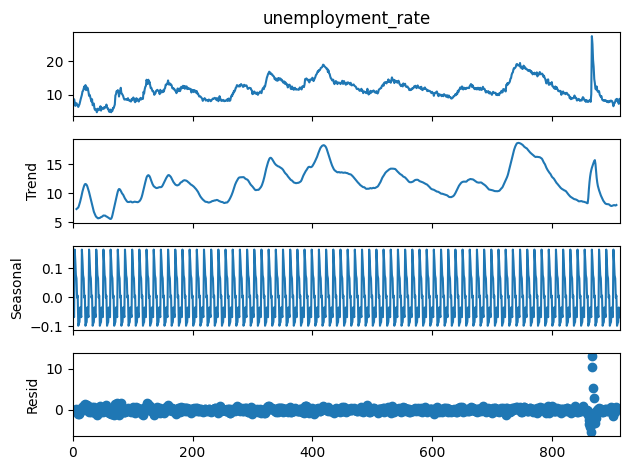

In [312]:
df_subject2_resid = df_subject2.copy()
decomposition = seasonal_decompose(df_subject2[SUBJECT2], model='additive', period=12)
decomposition.plot()
residual = decomposition.resid
df_subject2_resid[f'residual_{SUBJECT2}'] = residual
df_subject2_resid = df_subject2_resid.dropna()
test_stationarity(df_subject2_resid[f'residual_{SUBJECT2}'], SUBJECT2)

df_subject2_resid = df_subject2_resid.drop(columns=[SUBJECT2])
df_subject2_resid

Get correlation between the different meat types and subject

/tmp/ipykernel_490460/827016668.py:14: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(lags, cor, use_line_collection=True)


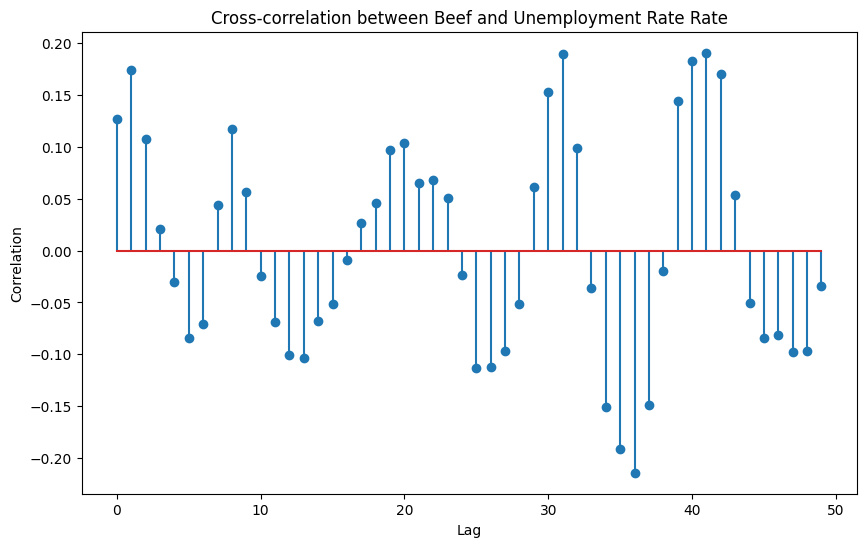

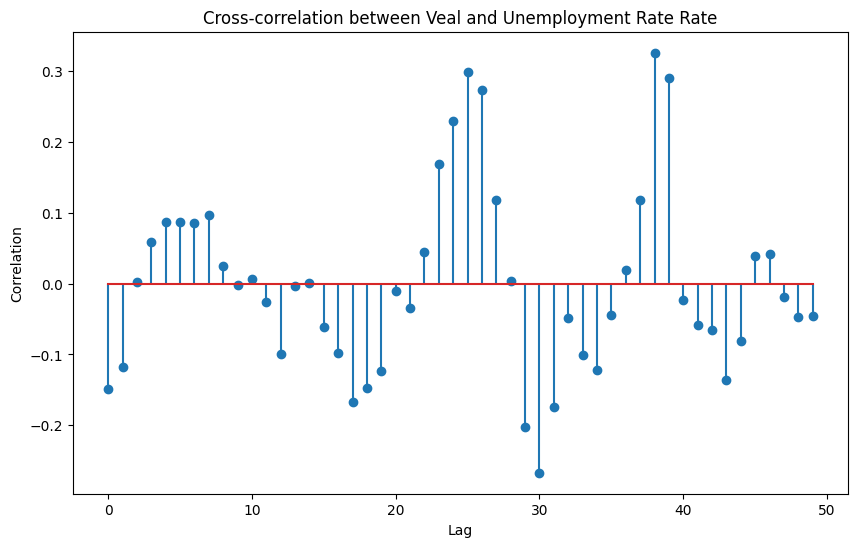

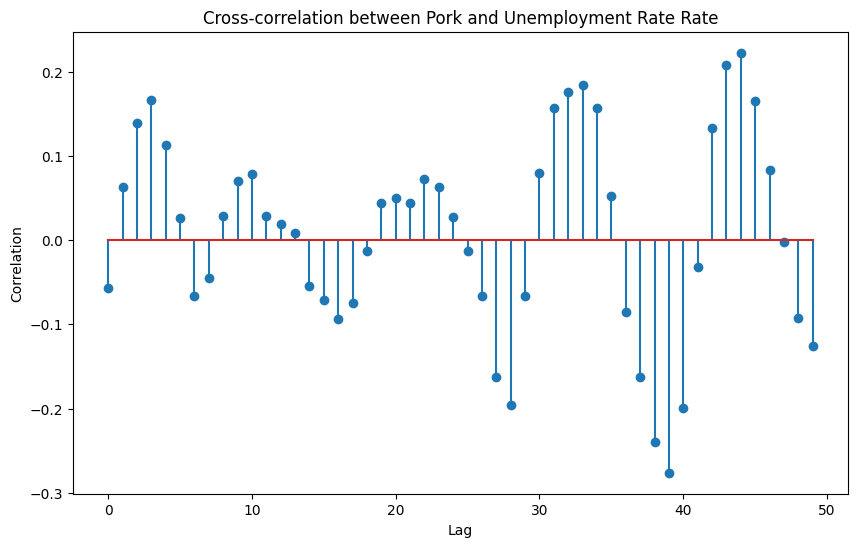

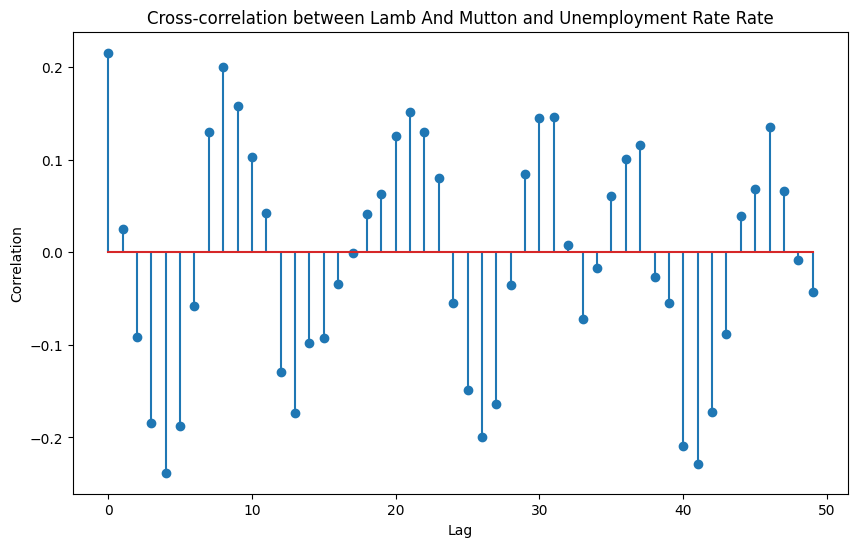

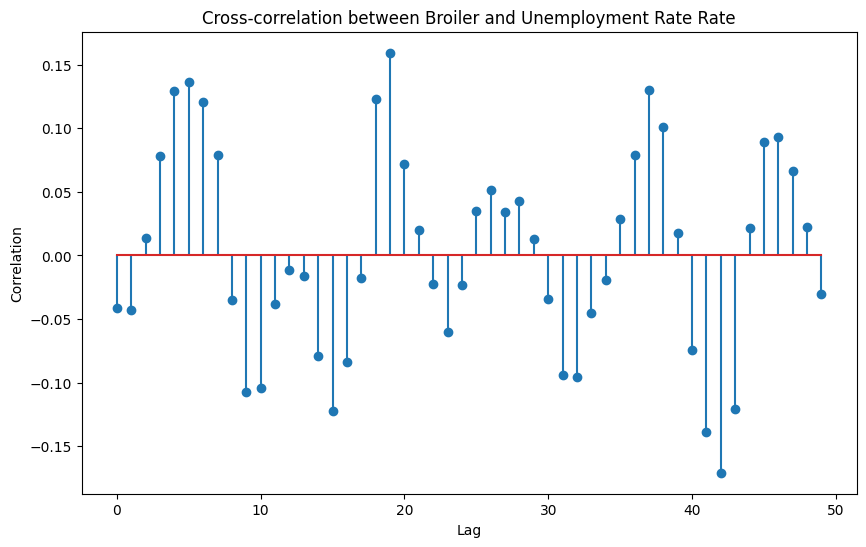

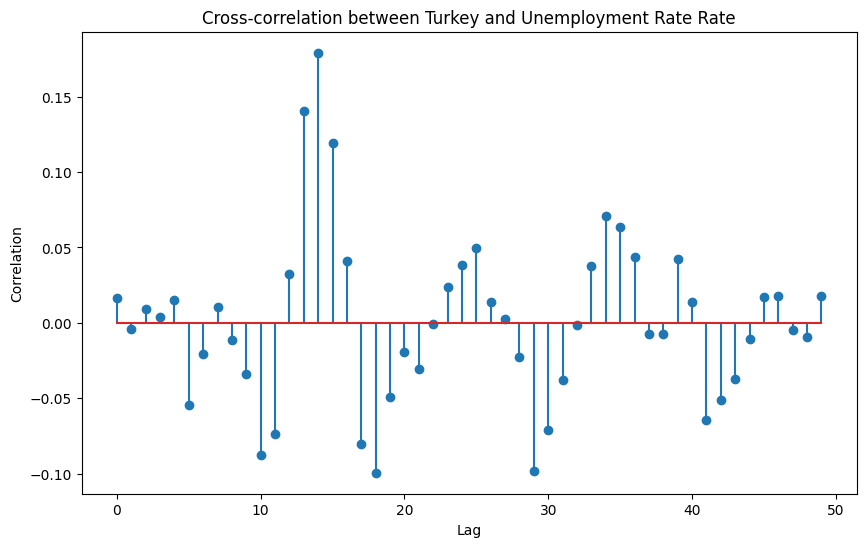

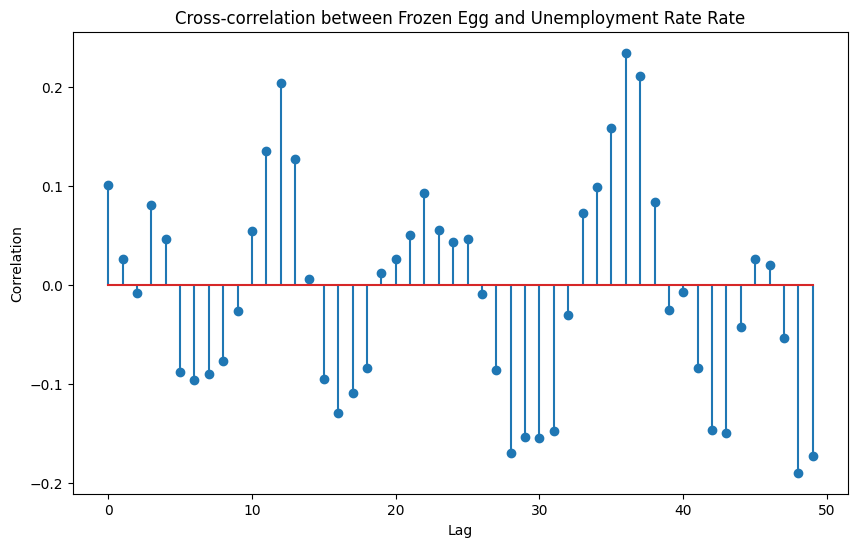

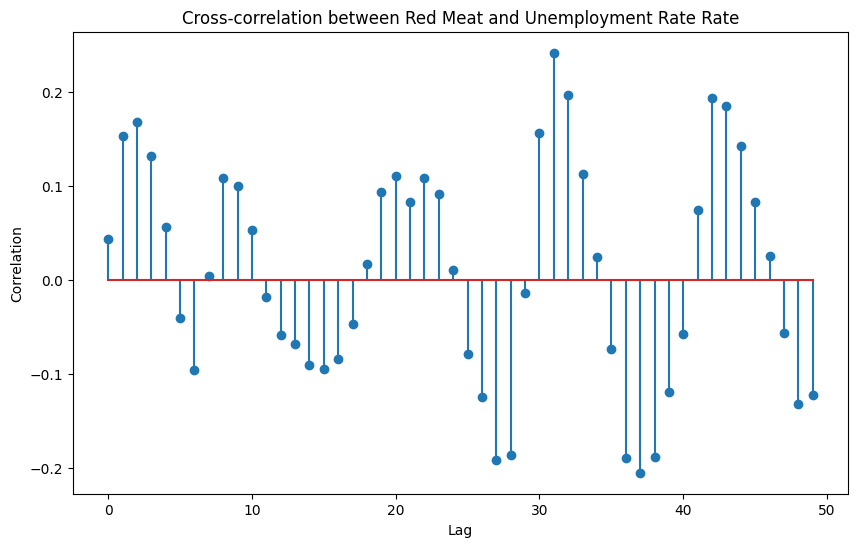

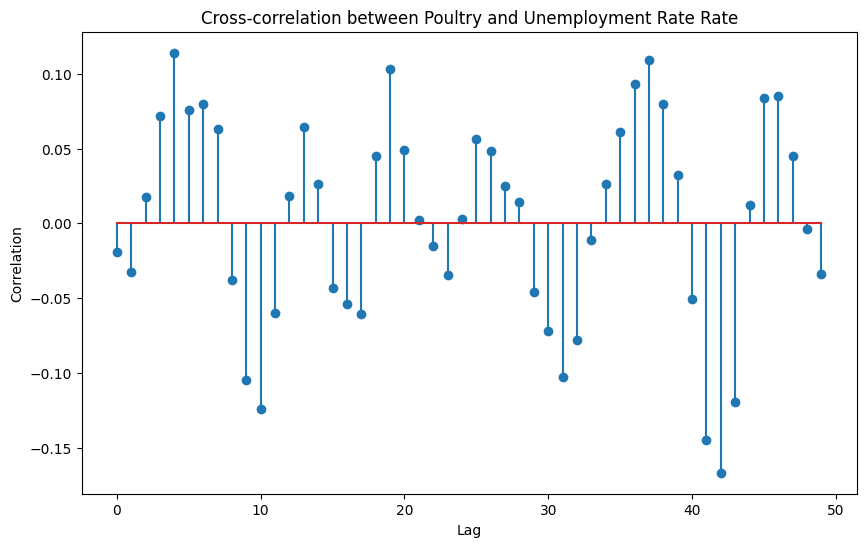

Correlation between Meat Production and Unemployment Rate Rate:
-------------------------------------
Beef: 0.1269, p-value: 0.0520
Veal: -0.1492, p-value: 0.0222
Pork: -0.0566, p-value: 0.3880
Lamb And Mutton: 0.2154, p-value: 0.0009
Broiler: -0.0416, p-value: 0.5254
Turkey: 0.0168, p-value: 0.7981
Frozen Egg: 0.1005, p-value: 0.1244
Red Meat: 0.0433, p-value: 0.5086
Poultry: -0.0190, p-value: 0.7724


In [313]:
common_start = max(df_subject1_resid['datetime'].min(), df_subject2_resid['datetime'].min())
common_end = min(df_subject1_resid['datetime'].max(), df_subject2_resid['datetime'].max())

df_subject1_resid = df_subject1_resid[(df_subject1_resid['datetime'] >= common_start) & (df_subject1_resid['datetime'] <= common_end)]
df_subject2_resid = df_subject2_resid[(df_subject2_resid['datetime'] >= common_start) & (df_subject2_resid['datetime'] <= common_end)]

merged_df = pd.merge(df_subject1_resid, df_subject2_resid, on='datetime')

for meat in MEAT_TYPE:
    max_lag = 50
    cor = ccf(merged_df[f'residual_{meat}'], merged_df[f'residual_{SUBJECT2}'], adjusted=False)[:max_lag]
    lags = np.arange(max_lag)
    plt.figure(figsize=(10, 6))
    plt.stem(lags, cor, use_line_collection=True)
    plt.title(f"Cross-correlation between {meat.replace('_', ' ').title()} and {SUBJECT_TITLE2} Rate")
    plt.xlabel('Lag')
    plt.ylabel('Correlation')
    plt.show()

# Get correlation between each meat type and subject rate
correlation = {}
for meat in MEAT_TYPE:
    correlation[meat] = stats.pearsonr(merged_df[f'residual_{meat}'], merged_df[f'residual_{SUBJECT2}'])

# Format the correlation values and print them
print(f"Correlation between Meat Production and {SUBJECT_TITLE2} Rate:")
print("-------------------------------------")
for cor in correlation:
    print(f"{cor.replace('_', ' ').title()}: {correlation[cor][0]:.4f}, p-value: {correlation[cor][1]:.4f}")
